<a href="https://colab.research.google.com/github/allnes/age_classifier/blob/master/zip_size/size_224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
age_classifier	LICENSE.txt  rcv1.ipynb        summaries
checkpoints	makefile     README.md	       trials
lib		nips2016     requirements.txt  usage.ipynb
From https://github.com/allnes/cnn_graph
 * branch            graph_train -> FETCH_HEAD
Already up to date.
['arr_0', 'arr_1']
(729, 50176)
(729,)
--> Reshape data


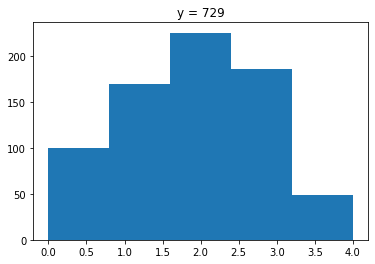

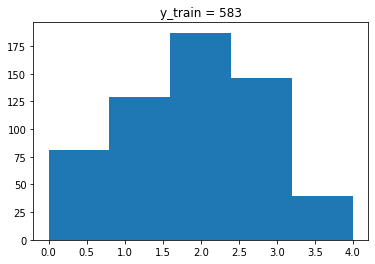

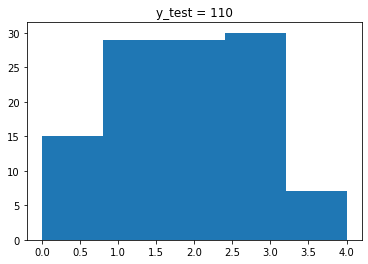

[0 1 2 3 4]
--> Get distance graph
d = |V| = 224, k|V| < |E| = 394448


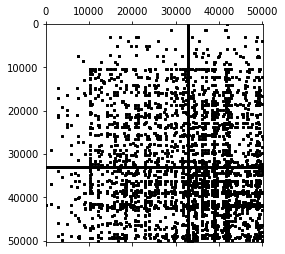

--> Get laplacian matrix


/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])
/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/coarsening.py:152: RuntimeWarning: divide by zero encountered in true_divide
  tval = vv[rs+jj] * (1.0/weights[tid] + 1.0/weights[nid])


Layer 0: M_0 = |V| = 389008 nodes (338832 added),|E| = 197224 edges
Layer 1: M_1 = |V| = 194504 nodes (144785 added),|E| = 197188 edges
Layer 2: M_2 = |V| = 97252 nodes (48028 added),|E| = 195697 edges
Layer 3: M_3 = |V| = 48626 nodes (0 added),|E| = 194269 edges
(583, 389008)
(36, 389008)
(110, 389008)
NN architecture
  input: M_0 = 389008
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 389008 * 32 / 4 = 3112064
    weights: F_0 * F_1 * K_1 = 1 * 32 * 16 = 512
    biases: M_1 * F_1 = 389008 * 32 = 12448256
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 97252 * 32 / 2 = 1556032
    weights: F_1 * F_2 * K_2 = 32 * 32 * 16 = 16384
    biases: M_2 * F_2 = 97252 * 32 = 3112064
  layer 3: fc1
    representation: M_3 = 700
    weights: M_2 * M_3 = 1556032 * 700 = 1089222400
    biases: M_3 = 700
  layer 4: logits (softmax)
    representation: M_4 = 5
    weights: M_3 * M_4 = 700 * 5 = 3500
    biases: M_4 = 5







Instructions for updating:
Please use `rate` instead of `

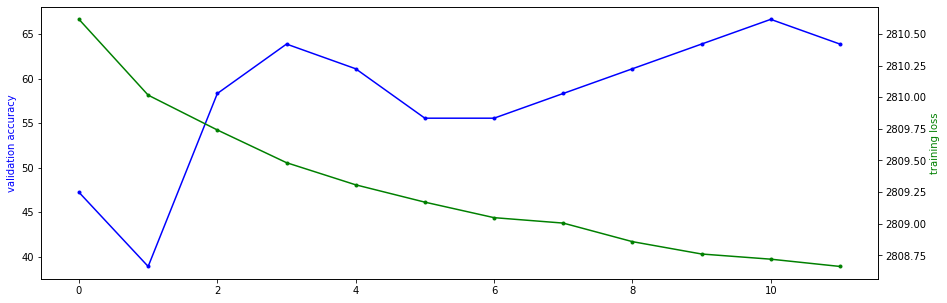

Time per step: 9613.06 ms
(110, 389008) (110,)
############ Class 0
(15, 389008)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 86.67 (13 / 15), f1 (weighted): 92.86, loss: 2.25e+03
time: 58s (wall 10s)
############ Class 1
(29, 389008)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 37.93 (11 / 29), f1 (weighted): 55.00, loss: 2.32e+03
time: 107s (wall 39s)
############ Class 2
(29, 389008)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 51.72 (15 / 29), f1 (weighted): 68.18, loss: 2.32e+03
time: 109s (wall 236s)
############ Class 3
(30, 389008)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 83.33 (25 / 30), f1 (weig

In [1]:
%tensorflow_version 1.x

from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/')
!ls

# !git clone https://github.com/mdeff/cnn_graph
# !git status
# !git fetch
# !git checkout graph_train
!git pull origin graph_train

# classes = { 2, 3, 4, 5, 6, 7, 9 }
# zip_size = { 64, 80, 96, 112, 128, 160, 192, 224 }

%run age_classifier/age_classes_fcn \
  --path_project='/content/drive/My Drive/DL_DATA_GRAPH/' \
  --path_data='NEW/resize/converted_data_resize_224.npz' \
  --zip_size=224 \
  --class_count=5 \
  --fcn_count=700 \

%matplotlib inline